In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Lecture et affichage de nos données
data = pd.read_excel('data.xlsx')
data.head()

,X1,X2,X3,X4,Y
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [92]:
#Normalisation des données
std = StandardScaler()
standard_data = std.fit_transform(data.iloc[:, 0:-1])
data.iloc[:, 0:-1] = standard_data

In [93]:
data.head()

,X1,X2,X3,X4,Y
0,-0.629519,-0.987297,1.820488,-0.009519,463.26
1,0.741909,0.681045,1.141863,-0.974621,444.37
2,-1.951297,-1.173018,-0.185078,1.289840,488.56
3,0.162205,0.237203,-0.508393,0.228160,446.48
4,-1.185069,-1.322539,-0.678470,1.596699,473.90


In [94]:
#On recupère les valeurs predites et celles à predir

y = data['Y']
x = data[['X1', 'X2', 'X3', 'X4']]
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.8)

In [95]:
model = LinearRegression()
model.fit(X_train,Y_train)
y_predict = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [96]:
print(y_predict)
print(y_pred_train)

[444.13972348 441.93903892 433.38807467 ... 474.02057918 467.51472208
 456.35119202]
[474.93006791 452.2257139  455.07949993 ... 469.08376853 458.61783808
 481.50700279]


In [97]:
#Erreur moyenne au carré

mse = mean_squared_error(y_predict, Y_test)
mse = np.sqrt(mse)
mse

4.554900959816921

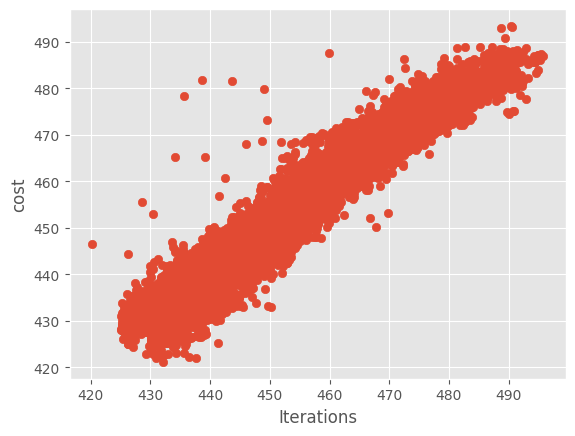

In [98]:
plt.scatter(Y_test, y_predict)
plt.xlabel('Iterations')
plt.ylabel('cost')
plt.show()